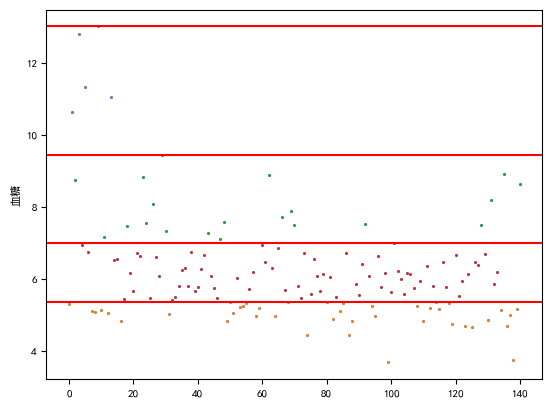

In [20]:
import pandas as pd
import pandas as pd
import warnings
import pylab as plt
warnings.filterwarnings('ignore')
data = pd.read_csv('附件2：无血糖值的检测数据.csv', encoding='gbk')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白']]
#男女0-1
plt.rc('font', family = 'SimHei', size = 8)
plt.rc('axes', unicode_minus = False)
data['性别'][data['性别'] == '男'] = 1
data['性别'][data['性别'] == '女'] = 0
data = data.fillna(data.mean())
import joblib
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(data)
model = joblib.load('xgboost.pkl')
data['血糖'] = model.predict(x)


plt.plot(data['血糖'], 'o', markersize = 1)

import joblib
model = joblib.load('k-means.pkl')

labels_ = model.predict(data['血糖'].values.reshape(-1, 1).astype(float))
for i in range(4):
    plt.plot(data[labels_ == i]['血糖'], 'o', markersize = 1)
    plt.axhline(data[labels_ == i]['血糖'].max(), c = 'r')

plt.ylabel('血糖')
plt.savefig('结果4.png', dpi = 500)

In [6]:
data['糖尿病风险'] = labels_

In [10]:
data['糖尿病风险'][data['糖尿病风险'] == 0] = '正常血糖'

In [15]:
data['糖尿病风险'][data['糖尿病风险'] == 2] = '具有糖尿病风险'

In [17]:
data['糖尿病风险'][data['糖尿病风险'] == 3] = '严重糖尿病'

In [18]:
data['糖尿病风险'][data['糖尿病风险'] == 1] = '糖尿病'

In [19]:
data.to_excel('结果4.xlsx')